In [18]:
import pandas as pd
import numpy as np
import requests
import re
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sb

from bs4 import BeautifulSoup

%matplotlib inline

In [5]:
kaggle_data = pd.read_csv('multiple_choice_responses.csv')
kaggle_data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [6]:
# Helper function to turn skills into columns and encode them
def get_skills_df(df):
    for col in df.columns.values:
        skill = df[pd.notnull(df[col])][col].unique()[0] # get the selected choice for the corresponding col
        df.loc[:, col] = df.loc[:, col].map({skill: 1})
        df.rename(columns={col:skill.lower()}, inplace=True)
    df.fillna(0, inplace=True)
    
    return df

In [7]:
# programming languages, Q18 in the dataset (10 options)
languages = kaggle_data[['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_Part_7', 
                       'Q18_Part_8', 'Q18_Part_9', 'Q18_Part_10']]
languages.drop([0], inplace=True)
languages = get_skills_df(languages)


# Get Visualization tools used: Q20
viz_tools = kaggle_data[['Q20_Part_1', 'Q20_Part_2', 'Q20_Part_3', 'Q20_Part_4', 'Q20_Part_5', 'Q20_Part_6', 'Q20_Part_7', 
                       'Q20_Part_8', 'Q20_Part_9', 'Q20_Part_10']]
viz_tools.drop([0], inplace=True)
viz_tools = get_skills_df(viz_tools)


# Get ML algorithms used on a regular basis: Q24
ml_algo = kaggle_data[['Q24_Part_1', 'Q24_Part_2', 'Q24_Part_3', 'Q24_Part_4', 'Q24_Part_5', 'Q24_Part_6', 'Q24_Part_7', 
                       'Q24_Part_8', 'Q24_Part_9', 'Q24_Part_10']]
ml_algo.drop([0], inplace=True)
ml_algo = get_skills_df(ml_algo)


# Get ML algorithms used on a regular basis: Q24
ml_algo = kaggle_data[['Q24_Part_1', 'Q24_Part_2', 'Q24_Part_3', 'Q24_Part_4', 'Q24_Part_5', 'Q24_Part_6', 'Q24_Part_7', 
                       'Q24_Part_8', 'Q24_Part_9', 'Q24_Part_10']]
ml_algo.drop([0], inplace=True)
ml_algo = get_skills_df(ml_algo)


# Get Computer Vision methods used on a regular basis
computer_vision = kaggle_data[['Q26_Part_1', 'Q26_Part_2', 'Q26_Part_3', 'Q26_Part_4', 'Q26_Part_5']]
computer_vision.drop([0], inplace=True)
computer_vision = get_skills_df(computer_vision)


# Get NLP methods used on a regular basis
nlp = kaggle_data[['Q27_Part_1', 'Q27_Part_2', 'Q27_Part_3', 'Q27_Part_4']]
nlp.drop([0], inplace=True)
nlp = get_skills_df(nlp)


# Get ML frameworks used: Q28
ml_frameworks = kaggle_data[['Q28_Part_1', 'Q28_Part_2', 'Q28_Part_3', 'Q28_Part_4', 'Q28_Part_5', 'Q28_Part_6', 'Q28_Part_7', 'Q28_Part_8', 'Q28_Part_9', 'Q28_Part_10']]
ml_frameworks.drop([0], inplace=True)
ml_frameworks = get_skills_df(ml_frameworks)


# Get cloud computing platforms used: Q29
cloud_computing = kaggle_data[['Q29_Part_1', 'Q29_Part_2', 'Q29_Part_3', 'Q29_Part_4', 'Q29_Part_5', 'Q29_Part_6',
                               'Q29_Part_7','Q29_Part_8', 'Q29_Part_9', 'Q29_Part_10']]
cloud_computing.drop([0], inplace=True)
cloud_computing = get_skills_df(cloud_computing)


# Get big data/ analytics products used: Q31
big_data = kaggle_data[['Q31_Part_1', 'Q31_Part_2', 'Q31_Part_3', 'Q31_Part_4', 'Q31_Part_5', 'Q31_Part_6',
                               'Q31_Part_7','Q31_Part_8', 'Q31_Part_9', 'Q31_Part_10']]
big_data.drop([0], inplace=True)
big_data = get_skills_df(big_data)


# Get ML products used: Q32
ml_products = kaggle_data[['Q32_Part_1', 'Q32_Part_2', 'Q32_Part_3', 'Q32_Part_4', 'Q32_Part_5', 'Q32_Part_6',
                               'Q32_Part_7','Q32_Part_8', 'Q32_Part_9', 'Q32_Part_10']]
ml_products.drop([0], inplace=True)
ml_products = get_skills_df(ml_products)


# Get database products used: Q34
db_products = kaggle_data[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6',
                               'Q34_Part_7','Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10']]
db_products.drop([0], inplace=True)
db_products = get_skills_df(db_products)


# Get database products used: Q34
db_products = kaggle_data[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6',
                               'Q34_Part_7','Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10']]
db_products.drop([0], inplace=True)
db_products = get_skills_df(db_products)


# Get database products used: Q34
db_products = kaggle_data[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6',
                               'Q34_Part_7','Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10']]
db_products.drop([0], inplace=True)
db_products = get_skills_df(db_products)

In [8]:
# Combine all the skills dataframe into one
kaggle_skills = pd.concat([languages, viz_tools, ml_algo, computer_vision, nlp, ml_frameworks, cloud_computing, 
                          big_data, ml_products, db_products], axis=1)
kaggle_skills.head(10)

,python,r,sql,c,c++,java,javascript,typescript,bash,matlab,...,mysql,postgressql,sqlite,microsoft sql server,oracle database,microsoft access,aws relational database service,aws dynamodb,azure sql database,google cloud sql
1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


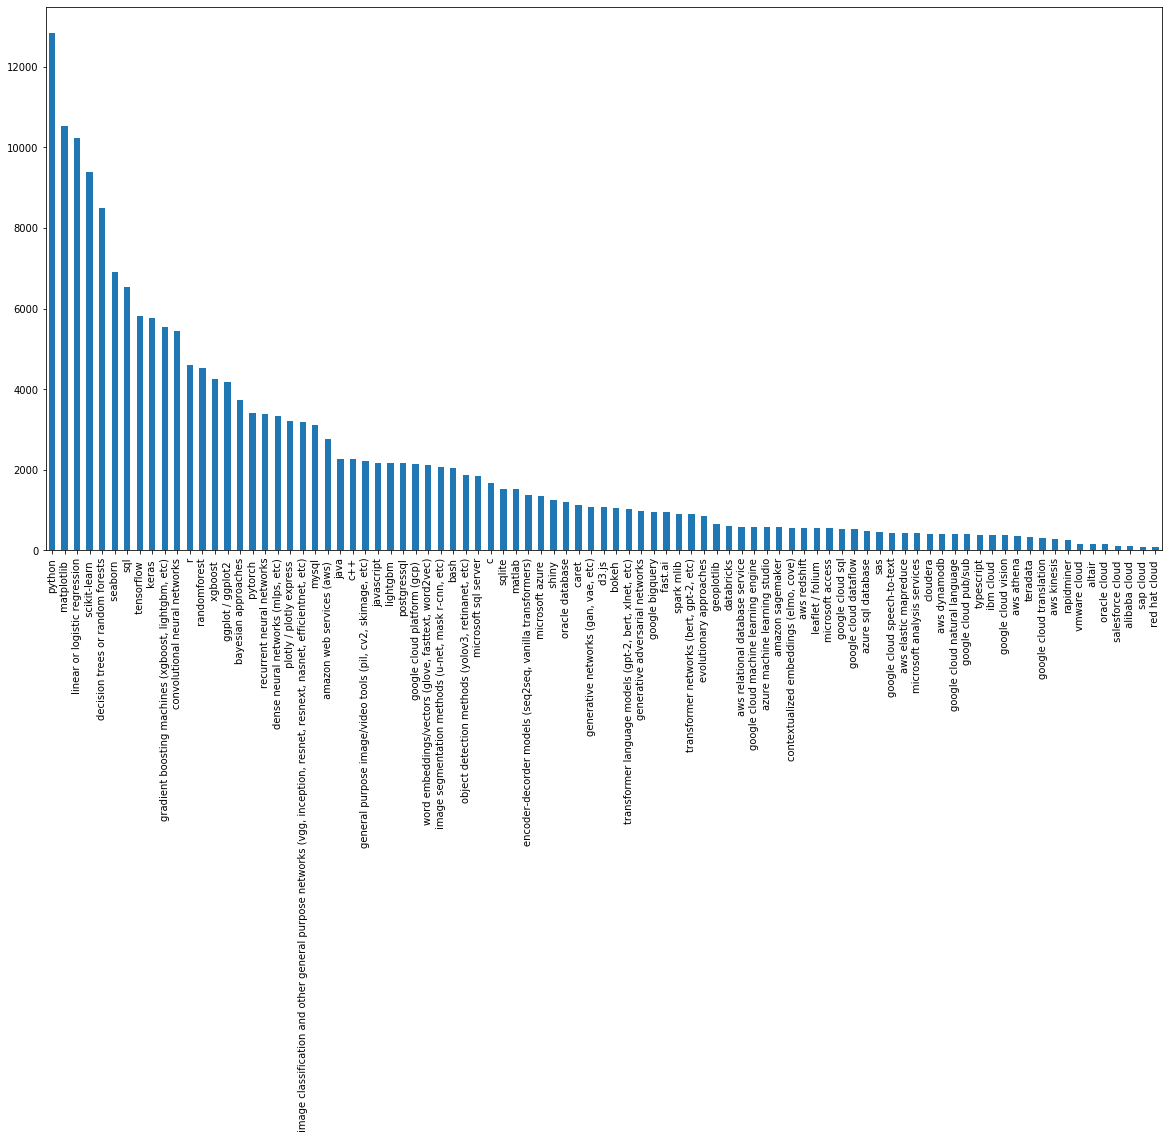

In [17]:
plt.figure(figsize=(20,10))
ax = kaggle_skills.sum().sort_values(ascending=False).plot(kind="bar")
plt.show()

In [ ]:
# Scrape indeed website, and store results in dataframe job_info
job_info = pd.DataFrame()
base = 'http://ca.indeed.com'
# Indeed displays ~10-15 jobs on each page, while each job itself can be identify as a page.
# So we search jobs every 10 pages.
# For 1000+ jobs, we need to go through 100+ pages with 10+ jobs on each page. 
pages = list(range(0,1100,10))

def get_jobs():
    for page in pages:
      result = requests.get("https://ca.indeed.com/jobs?q=data+analyst%2C+data+scientist&start="+str(page)).text
      soup = BeautifulSoup(result, 'lxml')

      for jobs in soup.find_all(class_ = "result"): 
        try:
          position_title = jobs.find('a', class_='jobtitle turnstileLink').text.strip()
        except:
          position_title = None

        try:
          employer = jobs.find('span', class_='company').text.strip()
        except:
          employer = None

        try:
          location = jobs.find('span', class_='location').text.strip()
        except:
          location = None

        try:
          salary = jobs.find('span', class_ = 'salaryText').text.strip()
        except:
          salary = None

        try:
          link = base + jobs.find('a').attrs['href']
        except:
          link = None

        job_info = job_info.append({
            'position_title': position_title, 
            'employer': employer,
            'location': location,
            'salary': salary,
            'link': link}, ignore_index = True)
        break
        
    #Delect dulicate jobs
    job_info = job_info.drop_duplicates(['link'], keep='first')